### Section I: Import the data

In [28]:
%matplotlib inline 

import pandas as pd
import seaborn as sns

import numpy as np
from sklearn import cluster
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn import cluster, datasets
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

In [70]:
iris = pd.read_csv("iris.csv")
iris

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [8]:
df=pd.DataFrame(data=iris, columns=['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Name'])

In [9]:
def name_to_numeric(x):
    if x=='Iris-setosa':
        return 1
    if x=='Iris-virginica':
        return 2
    if x=='Iris-versicolor':
        return 3

In [13]:
df['name_num'] = df['Name'].apply(name_to_numeric)
del df['Name']

In [60]:
df.name_num.value_counts()

3    50
2    50
1    50
Name: name_num, dtype: int64

### Plot the Data

In [30]:
#df.plot(kind='scatter',x='name_num',y='name_num',figsize=(3,3))

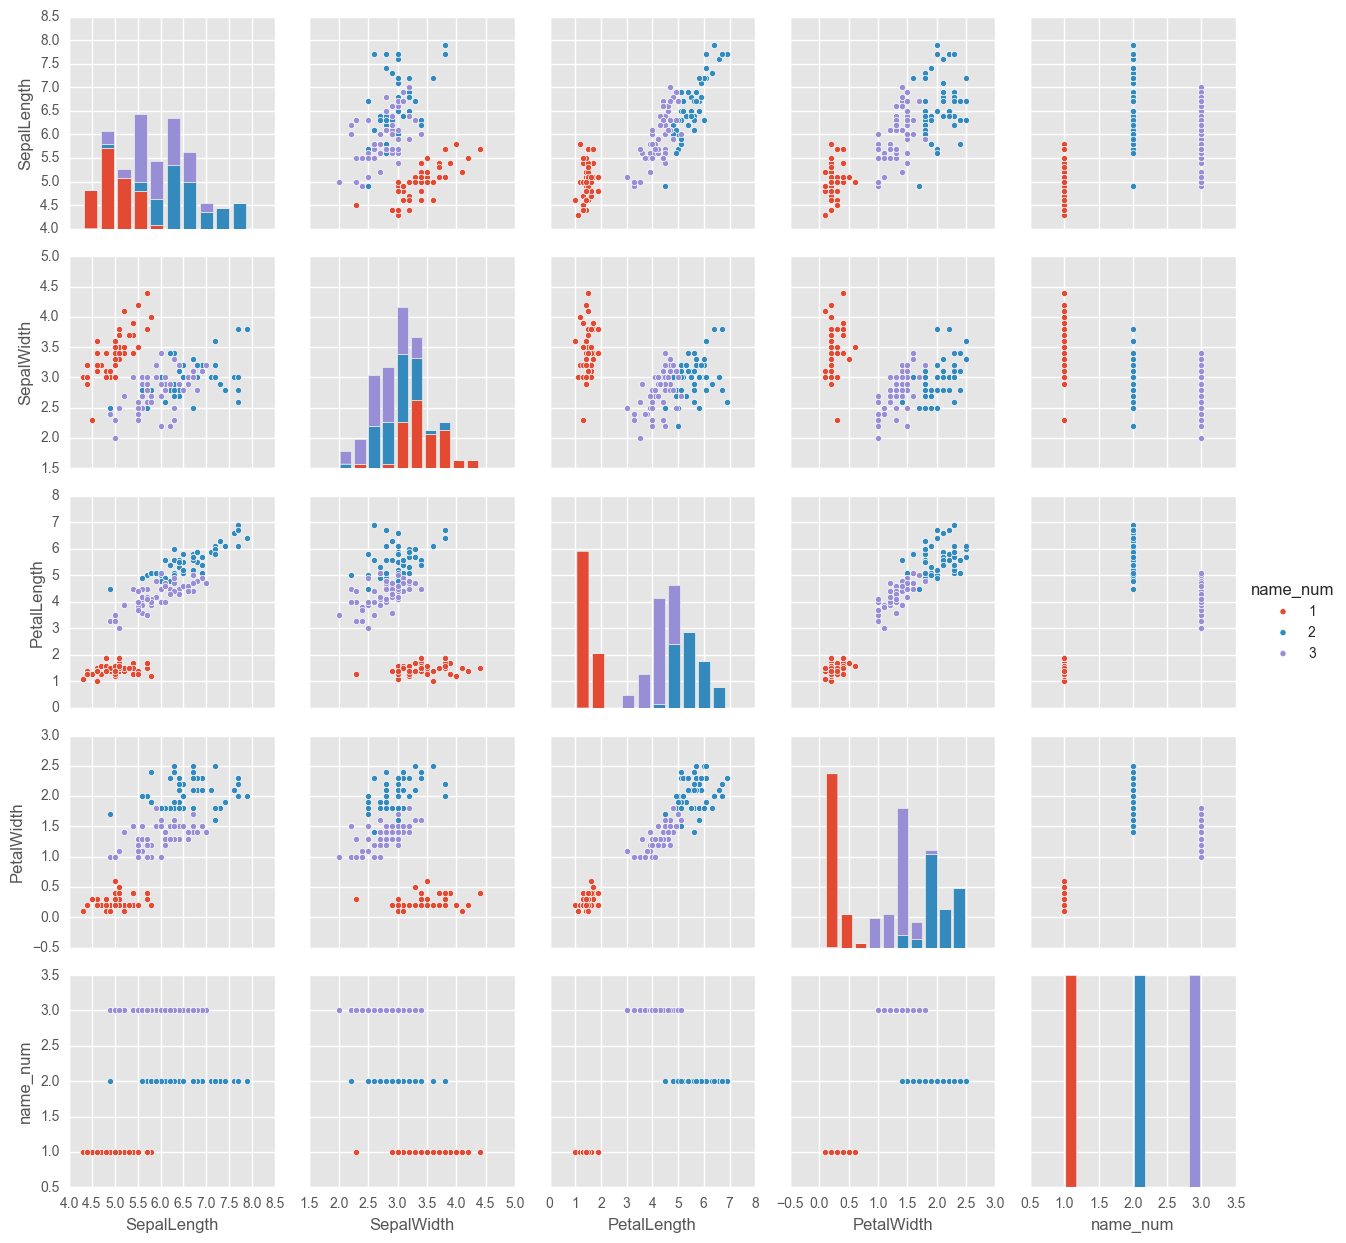

In [29]:
sns.pairplot(df,hue='name_num')

### Extract the features you to use in clustering into a matrix

In [77]:
dn=df.as_matrix(columns=None)
dn

array([[ 5.1,  3.5,  1.4,  0.2,  1. ],
       [ 4.9,  3. ,  1.4,  0.2,  1. ],
       [ 4.7,  3.2,  1.3,  0.2,  1. ],
       [ 4.6,  3.1,  1.5,  0.2,  1. ],
       [ 5. ,  3.6,  1.4,  0.2,  1. ],
       [ 5.4,  3.9,  1.7,  0.4,  1. ],
       [ 4.6,  3.4,  1.4,  0.3,  1. ],
       [ 5. ,  3.4,  1.5,  0.2,  1. ],
       [ 4.4,  2.9,  1.4,  0.2,  1. ],
       [ 4.9,  3.1,  1.5,  0.1,  1. ],
       [ 5.4,  3.7,  1.5,  0.2,  1. ],
       [ 4.8,  3.4,  1.6,  0.2,  1. ],
       [ 4.8,  3. ,  1.4,  0.1,  1. ],
       [ 4.3,  3. ,  1.1,  0.1,  1. ],
       [ 5.8,  4. ,  1.2,  0.2,  1. ],
       [ 5.7,  4.4,  1.5,  0.4,  1. ],
       [ 5.4,  3.9,  1.3,  0.4,  1. ],
       [ 5.1,  3.5,  1.4,  0.3,  1. ],
       [ 5.7,  3.8,  1.7,  0.3,  1. ],
       [ 5.1,  3.8,  1.5,  0.3,  1. ],
       [ 5.4,  3.4,  1.7,  0.2,  1. ],
       [ 5.1,  3.7,  1.5,  0.4,  1. ],
       [ 4.6,  3.6,  1. ,  0.2,  1. ],
       [ 5.1,  3.3,  1.7,  0.5,  1. ],
       [ 4.8,  3.4,  1.9,  0.2,  1. ],
       [ 5. ,  3. ,  1.6,

### Cluster the data using K-Means Clustering

Cluster two of the variables of your choice. Choose K based on your plots and the behavior of the data

In [86]:
k=2
kmeans=cluster.KMeans(n_clusters=k)
kmeans.fit(dn)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=2, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [87]:
labels=kmeans.labels_
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [88]:
kmeans.predict([5.1,  3.5,  1.4,  0.2,  1])

//anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([0], dtype=int32)

In [93]:
kmeans.predict([2,2,2,2,2])

//anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([0], dtype=int32)

In [55]:
centroids=kmeans.cluster_centers_
centroids

array([[ 6.262,  2.872,  4.906,  1.676,  2.5  ],
       [ 5.006,  3.418,  1.464,  0.244,  1.   ]])

### Find the Silhoutte Score and plot the features and clusters

In [56]:
metrics.silhouette_score(dn,labels,metric='euclidean')

0.6956509321199762

In [ ]:
#independent practise

In [57]:
mtcars = pd.read_csv("../../assets/datasets/mtcars.csv")
mtcars.head()

,Car,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
